In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor,XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

In [3]:
df0 = pd.read_excel('Data.xlsx')

In [4]:
df0
df0.shape

(208087, 26)

In [5]:
df=df0.drop_duplicates()
df.shape

(207235, 26)

In [6]:
df.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')

In [7]:
df['AVG_MONTHLY_PASS_AIRLINE'].value_counts()

13382999    207235
Name: AVG_MONTHLY_PASS_AIRLINE, dtype: int64

In [8]:
df['FLT_ATTENDANTS_PER_PASS'].value_counts()

0.000062    207235
Name: FLT_ATTENDANTS_PER_PASS, dtype: int64

In [9]:
df['GROUND_SERV_PER_PASS'].value_counts()

0.000099    207235
Name: GROUND_SERV_PER_PASS, dtype: int64

In [10]:
df = df.drop('DEP_TIME_BLK',axis=1)
df = df.drop('CARRIER_NAME',axis=1)
df = df.drop('AVG_MONTHLY_PASS_AIRLINE',axis=1)
df = df.drop('FLT_ATTENDANTS_PER_PASS',axis=1)
df = df.drop('GROUND_SERV_PER_PASS',axis=1)

In [11]:
df = df.drop('PREVIOUS_AIRPORT',axis=1)
df = df.drop('DEPARTING_AIRPORT',axis=1)

#### Changing Categorical variables data type to object 

In [12]:
df1 = df
# len(df1)

In [13]:
df1[['MONTH','DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER']] = df1[['MONTH', 'DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER']].astype(object)

In [14]:
df1['DEP_DEL15'].value_counts()

0    162979
1     44256
Name: DEP_DEL15, dtype: int64

In [15]:
x = df.iloc[:,df1.columns !='DEP_DEL15' ]
y = df.iloc[:,2]

#### Create Dummies

In [16]:
x = pd.get_dummies(x)
x.shape

(207235, 45)

In [17]:
x.columns

Index(['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'AVG_MONTHLY_PASS_AIRPORT', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE',
       'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'MONTH_1', 'MONTH_2', 'MONTH_3',
       'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4',
       'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'DISTANCE_GROUP_1',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4',
       'DISTANCE_GROUP_5', 'DISTANCE_GROUP_6', 'DISTANCE_GROUP_7',
       'DISTANCE_GROUP_8', 'DISTANCE_GROUP_9', 'DISTANCE_GROUP_10',
       'DISTANCE_GROUP_11', 'SEGMENT_NUMBER_1', 'SEGMENT_NUMBER_2',
       'SEGMENT_NUMBER_3', 'SEGMENT_NUMBER_4', 'SEGMENT_NUMBER_5',
       'SEGMENT_NUMBER_6', 'SEGMENT_NUMBER_7', 'SEGMENT_NUMBER_8',
       'SEGMENT_NUMBER_9', 'SEGMENT_NUMBER_10'],
      dtype='object')

#### train test split

In [18]:
x_t,x_test,y_t,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

##### Checking Imbalance of predictor variable in train set

In [19]:
y_t.value_counts()

0    130410
1     35378
Name: DEP_DEL15, dtype: int64

##### Balancing the train set

In [20]:
sm = SMOTE()
sm_x,sm_y=sm.fit_resample(x_t,y_t)

In [21]:
x_tr = sm_x
y_tr =sm_y
y_tr.value_counts()

0    130410
1    130410
Name: DEP_DEL15, dtype: int64

#### Splitting Train set to train and validation

In [22]:
x_train,x_valid,y_train,y_valid = train_test_split(x_tr,y_tr,test_size=0.4,random_state=10)

In [23]:
x_train.shape

(156492, 45)

In [24]:
x_valid.shape

(104328, 45)

#### Random Forest Full Model

In [25]:
rf = RandomForestClassifier(random_state=0)

In [26]:
full = rf.fit(x_train,y_train)

In [27]:
full_train_pred = full.predict(x_train)
confusion_matrix(y_train,full_train_pred)

array([[78276,   137],
       [  222, 77857]], dtype=int64)

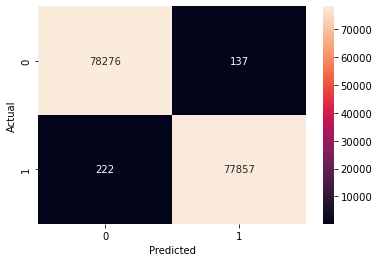

In [28]:
sns.heatmap(confusion_matrix(y_train,full_train_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
accuracy_score(y_train,full_train_pred)

0.9977059530199627

In [30]:
full_valid_pred = full.predict(x_valid)
confusion_matrix(y_valid,full_valid_pred)

array([[46500,  5497],
       [ 9744, 42587]], dtype=int64)

In [31]:
accuracy_score(y_valid,full_valid_pred)

0.8539126600720803

In [32]:
full_test_pred = full.predict(x_test)
confusion_matrix(y_test,full_test_pred)

array([[29163,  3406],
       [ 6176,  2702]], dtype=int64)

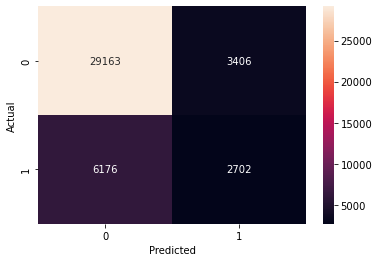

In [33]:
sns.heatmap(confusion_matrix(y_test,full_test_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
accuracy_score(y_test,full_test_pred)

0.7688131831013101

In [35]:
print(classification_report(y_test,full_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     32569
           1       0.44      0.30      0.36      8878

    accuracy                           0.77     41447
   macro avg       0.63      0.60      0.61     41447
weighted avg       0.74      0.77      0.75     41447



### Feature Importance

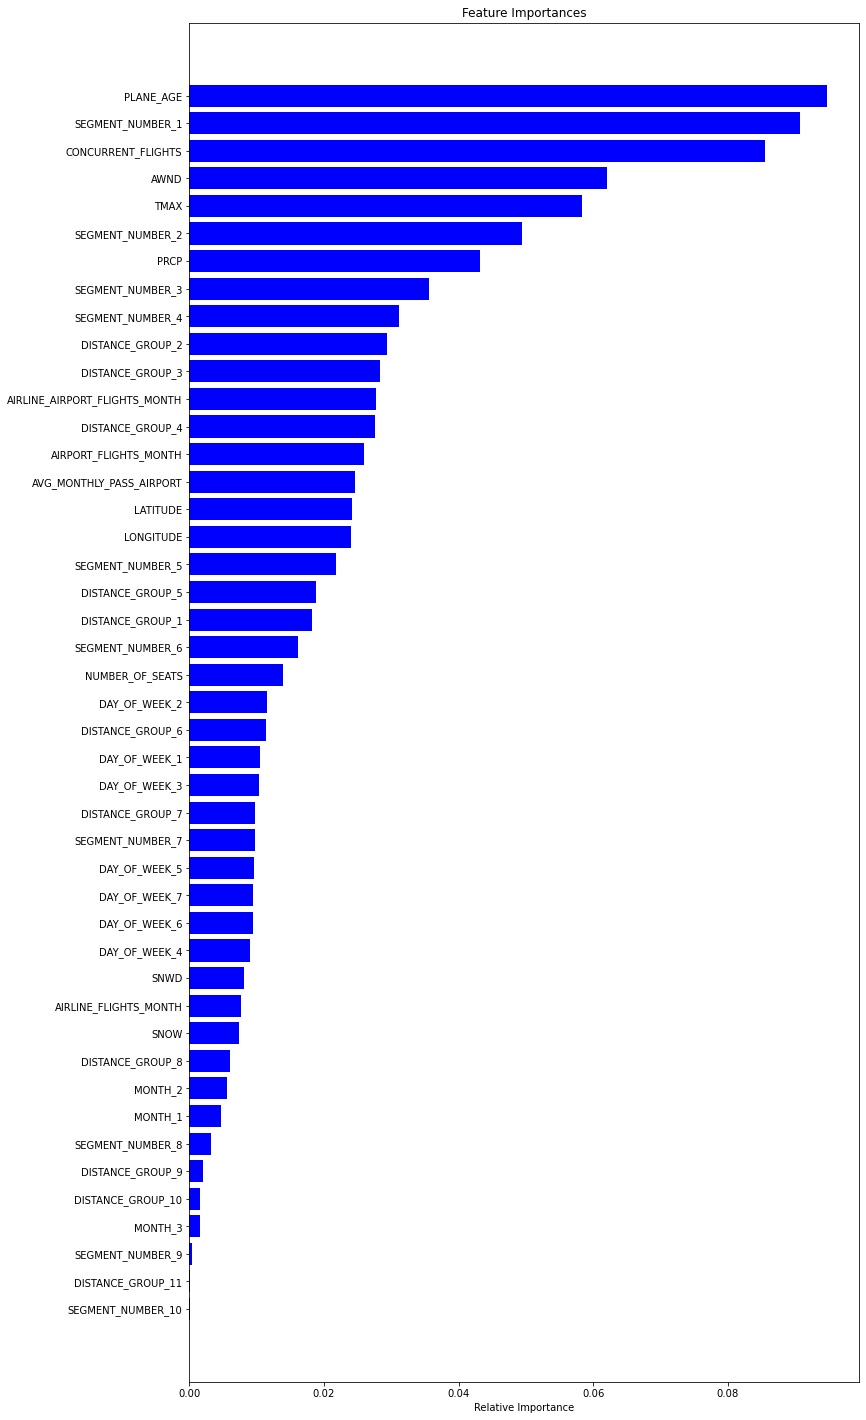

In [36]:
features = x_train.columns
importances = full.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(12,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [37]:
importances
feature_importances = pd.DataFrame(importances, index=x_t.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
PLANE_AGE,0.094752
SEGMENT_NUMBER_1,0.090750
CONCURRENT_FLIGHTS,0.085471
AWND,0.062033
TMAX,0.058262
SEGMENT_NUMBER_2,0.049381
PRCP,0.043136
SEGMENT_NUMBER_3,0.035603
SEGMENT_NUMBER_4,0.031090
DISTANCE_GROUP_2,0.029370


In [39]:
x_train.columns

Index(['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'AVG_MONTHLY_PASS_AIRPORT', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE',
       'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'MONTH_1', 'MONTH_2', 'MONTH_3',
       'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4',
       'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'DISTANCE_GROUP_1',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4',
       'DISTANCE_GROUP_5', 'DISTANCE_GROUP_6', 'DISTANCE_GROUP_7',
       'DISTANCE_GROUP_8', 'DISTANCE_GROUP_9', 'DISTANCE_GROUP_10',
       'DISTANCE_GROUP_11', 'SEGMENT_NUMBER_1', 'SEGMENT_NUMBER_2',
       'SEGMENT_NUMBER_3', 'SEGMENT_NUMBER_4', 'SEGMENT_NUMBER_5',
       'SEGMENT_NUMBER_6', 'SEGMENT_NUMBER_7', 'SEGMENT_NUMBER_8',
       'SEGMENT_NUMBER_9', 'SEGMENT_NUMBER_10'],
      dtype='object')

### XGBoost Full Model

In [40]:
fullxg = XGBClassifier() 
fullxg.fit(x_train, y_train)
pred_xg = fullxg.predict(x_train)
confusion_matrix(y_train,pred_xg)

C:\Users\rawee\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:44:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[76039,  2374],
       [17209, 60870]], dtype=int64)

In [41]:
accuracy_score(y_train,pred_xg)

0.8748626127853181

In [42]:
te_pred_xg = fullxg.predict(x_test)
confusion_matrix(y_test,te_pred_xg)

array([[31235,  1334],
       [ 7050,  1828]], dtype=int64)

In [43]:
accuracy_score(y_test,te_pred_xg)

0.7977175670132941

In [44]:
print(classification_report(y_test,te_pred_xg))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     32569
           1       0.58      0.21      0.30      8878

    accuracy                           0.80     41447
   macro avg       0.70      0.58      0.59     41447
weighted avg       0.76      0.80      0.76     41447



### Reduced RF Model

In [45]:
x_train = x_train[['PLANE_AGE', 'LATITUDE', 'LONGITUDE',
       'PRCP','TMAX', 'AWND', 'DISTANCE_GROUP_1',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4',
       'DISTANCE_GROUP_5', 'DISTANCE_GROUP_6', 'DISTANCE_GROUP_7',
       'DISTANCE_GROUP_8', 'DISTANCE_GROUP_9', 'DISTANCE_GROUP_10',
       'DISTANCE_GROUP_11', 'SEGMENT_NUMBER_1', 'SEGMENT_NUMBER_2',
       'SEGMENT_NUMBER_3', 'SEGMENT_NUMBER_4', 'SEGMENT_NUMBER_5',
       'SEGMENT_NUMBER_6', 'SEGMENT_NUMBER_7', 'SEGMENT_NUMBER_8',
       'SEGMENT_NUMBER_9', 'SEGMENT_NUMBER_10','AIRPORT_FLIGHTS_MONTH',
       'CONCURRENT_FLIGHTS', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT']]  

rf_model = rf.fit(x_train,y_train)
rf_train_pred = rf_model.predict(x_train)
confusion_matrix(y_train,rf_train_pred)

array([[78285,   128],
       [  243, 77836]], dtype=int64)

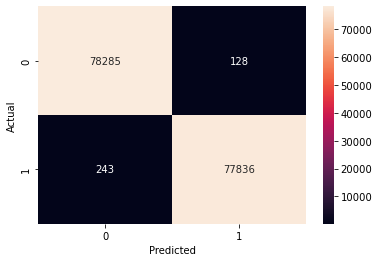

In [46]:
sns.heatmap(confusion_matrix(y_train,rf_train_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
accuracy_score(y_train,rf_train_pred)

0.9976292717838612

In [48]:
x_valid = x_valid[['PLANE_AGE', 'LATITUDE', 'LONGITUDE',
       'PRCP','TMAX', 'AWND', 'DISTANCE_GROUP_1',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4',
       'DISTANCE_GROUP_5', 'DISTANCE_GROUP_6', 'DISTANCE_GROUP_7',
       'DISTANCE_GROUP_8', 'DISTANCE_GROUP_9', 'DISTANCE_GROUP_10',
       'DISTANCE_GROUP_11', 'SEGMENT_NUMBER_1', 'SEGMENT_NUMBER_2',
       'SEGMENT_NUMBER_3', 'SEGMENT_NUMBER_4', 'SEGMENT_NUMBER_5',
       'SEGMENT_NUMBER_6', 'SEGMENT_NUMBER_7', 'SEGMENT_NUMBER_8',
       'SEGMENT_NUMBER_9', 'SEGMENT_NUMBER_10','AIRPORT_FLIGHTS_MONTH',
       'CONCURRENT_FLIGHTS', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT']]
rf_valid_pred = rf_model.predict(x_valid)
confusion_matrix(y_valid,rf_valid_pred)

array([[46811,  5186],
       [10180, 42151]], dtype=int64)

In [49]:
accuracy_score(y_valid,rf_valid_pred)

0.8527145157579941

In [50]:
x_test = x_test[['PLANE_AGE', 'LATITUDE', 'LONGITUDE',
       'PRCP','TMAX', 'AWND', 'DISTANCE_GROUP_1',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4',
       'DISTANCE_GROUP_5', 'DISTANCE_GROUP_6', 'DISTANCE_GROUP_7',
       'DISTANCE_GROUP_8', 'DISTANCE_GROUP_9', 'DISTANCE_GROUP_10',
       'DISTANCE_GROUP_11', 'SEGMENT_NUMBER_1', 'SEGMENT_NUMBER_2',
       'SEGMENT_NUMBER_3', 'SEGMENT_NUMBER_4', 'SEGMENT_NUMBER_5',
       'SEGMENT_NUMBER_6', 'SEGMENT_NUMBER_7', 'SEGMENT_NUMBER_8',
       'SEGMENT_NUMBER_9', 'SEGMENT_NUMBER_10','AIRPORT_FLIGHTS_MONTH',
       'CONCURRENT_FLIGHTS', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT']]
orf_test_pred = rf_model.predict(x_test)
confusion_matrix(y_test,orf_test_pred)

array([[29360,  3209],
       [ 6438,  2440]], dtype=int64)

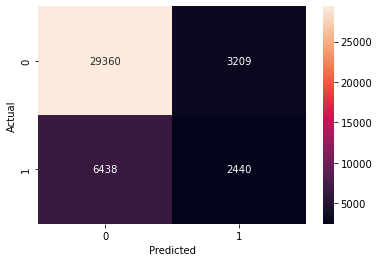

In [51]:
sns.heatmap(confusion_matrix(y_test,orf_test_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
accuracy_score(y_test,orf_test_pred)

0.767244915192897

In [53]:
print(classification_report(y_test,orf_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     32569
           1       0.43      0.27      0.34      8878

    accuracy                           0.77     41447
   macro avg       0.63      0.59      0.60     41447
weighted avg       0.74      0.77      0.75     41447



In [54]:
x_valid.shape

(104328, 31)

In [55]:
np.sqrt(39)

6.244997998398398

In [56]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Hyper Parameter Tunning

In [52]:
params = {'criterion':['entropy'], 'n_estimators':[200,300,400], 'max_features':[6,10,25], 'min_samples_leaf':[15,20,25], 'max_depth':[15,25,35] }
cv=KFold(n_splits=5, shuffle=True)

In [53]:
gsearch = GridSearchCV(orf,params,cv=cv)
results = gsearch.fit(x_train,y_train)
results.best_params_

KeyboardInterrupt: 

In [58]:
orf = RandomForestClassifier(criterion="gini", max_features=25 , max_depth=30, n_estimators=400, min_samples_leaf=25, min_samples_split=25, random_state=8)
#orf = RandomForestClassifier()

###### train

In [59]:
orf_model = orf.fit(x_train,y_train)

orf_train_pred = orf_model.predict(x_train)
confusion_matrix(y_train,orf_train_pred)

array([[76092,  2321],
       [20157, 57922]], dtype=int64)

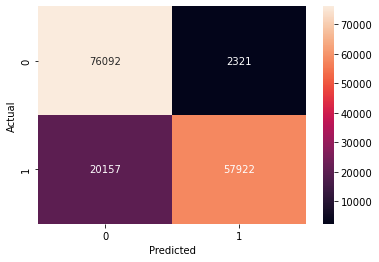

In [60]:
sns.heatmap(confusion_matrix(y_train,orf_train_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
accuracy_score(y_train,orf_train_pred)

0.856363264575825

###### validation

In [588]:
#x_valid = x_valid[['LATITUDE','LONGITUDE','PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX','AWND']]
orf_valid_pred = orf_model.predict(x_valid)
confusion_matrix(y_valid,orf_valid_pred)

array([[49724,  2273],
       [14594, 37737]], dtype=int64)

In [ ]:
sns.heatmap(confusion_matrix(y_valid,orf_valid_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [591]:
accuracy_score(y_valid,orf_valid_pred)

0.8383271988344452

###### test

In [62]:
x_test = x_test[['PLANE_AGE', 'LATITUDE', 'LONGITUDE',
       'PRCP','TMAX', 'AWND', 'DISTANCE_GROUP_1',
       'DISTANCE_GROUP_2', 'DISTANCE_GROUP_3', 'DISTANCE_GROUP_4',
       'DISTANCE_GROUP_5', 'DISTANCE_GROUP_6', 'DISTANCE_GROUP_7',
       'DISTANCE_GROUP_8', 'DISTANCE_GROUP_9', 'DISTANCE_GROUP_10',
       'DISTANCE_GROUP_11', 'SEGMENT_NUMBER_1', 'SEGMENT_NUMBER_2',
       'SEGMENT_NUMBER_3', 'SEGMENT_NUMBER_4', 'SEGMENT_NUMBER_5',
       'SEGMENT_NUMBER_6', 'SEGMENT_NUMBER_7', 'SEGMENT_NUMBER_8',
       'SEGMENT_NUMBER_9', 'SEGMENT_NUMBER_10','AIRPORT_FLIGHTS_MONTH',
       'CONCURRENT_FLIGHTS', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT']]
orf_test_pred = orf_model.predict(x_test)
confusion_matrix(y_test,orf_test_pred)

array([[31160,  1409],
       [ 7452,  1426]], dtype=int64)

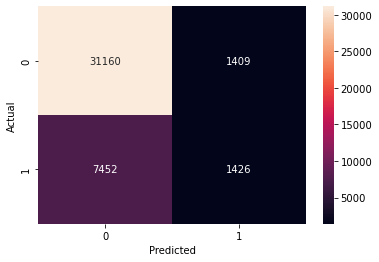

In [63]:
sns.heatmap(confusion_matrix(y_test,orf_test_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
accuracy_score(y_test,orf_test_pred)

0.7862088932854007

In [65]:
print(classification_report(y_test,orf_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     32569
           1       0.50      0.16      0.24      8878

    accuracy                           0.79     41447
   macro avg       0.66      0.56      0.56     41447
weighted avg       0.74      0.79      0.74     41447



## QDA 

In [210]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB #Naive Bayes

In [211]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [220]:
y_pred=qda.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[32320,   249],
       [ 8724,   154]], dtype=int64)

In [221]:
accuracy_score(y_test,y_pred)

0.7835066470432118

## logistic R

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
lr = LogisticRegression()

In [217]:
lr.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [218]:
lr_pred = lr.predict(x_test)
confusion_matrix(y_test,lr_pred)

array([[30200,  2369],
       [ 7373,  1505]], dtype=int64)

In [219]:
accuracy_score(y_test,lr_pred)

0.7649528313267546

### XGBoost

In [96]:
xgbcl=XGBClassifier() 
xgbcl.fit(x_train, y_train)

C:\Users\rawee\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
y_pred_train=xgbcl.predict(x_train)

In [98]:
confusion_matrix(y_train,y_pred_train)

array([[76297,  2116],
       [19838, 58241]], dtype=int64)

In [99]:
accuracy_score(y_train,y_pred_train)

0.8597116785522583

In [100]:
y_pred=xgbcl.predict(x_test)

In [101]:
confusion_matrix(y_test,y_pred)

array([[31284,  1285],
       [ 7355,  1523]], dtype=int64)

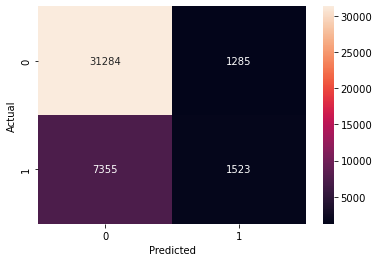

In [102]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [103]:
accuracy_score(y_test,y_pred)

0.7915410041740053

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     32569
           1       0.54      0.17      0.26      8878

    accuracy                           0.79     41447
   macro avg       0.68      0.57      0.57     41447
weighted avg       0.75      0.79      0.75     41447



In [105]:
xgbcl=XGBClassifier(max_depth=6,n_estimators=200, learning_rate=0.2, random_state=0)
xgbcl.fit(x_train, y_train)

C:\Users\rawee\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [255]:
xgbcl.get_params()

In [256]:
max_depth 
params = {'max_depth':[5,8,10,12,15],'n_estimators':[100,150,200]}
cv=KFold(n_splits=5, shuffle=True)

In [257]:
gsearch = GridSearchCV(xgbcl,params,cv=cv)
results = gsearch.fit(x_train,y_train)
results.best_params_

In [106]:
y_pred_train=xgbcl.predict(x_train)

In [107]:
confusion_matrix(y_train,y_pred_train)

array([[76279,  2134],
       [19410, 58669]], dtype=int64)

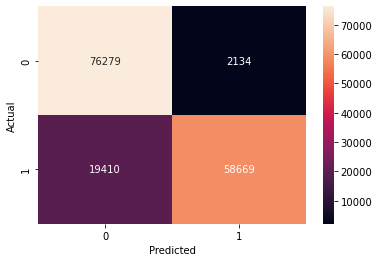

In [108]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [109]:
accuracy_score(y_train,y_pred_train)

0.8623316207857271

In [110]:
y_pred=xgbcl.predict(x_test)

In [111]:
confusion_matrix(y_test,y_pred)

array([[31277,  1292],
       [ 7243,  1635]], dtype=int64)

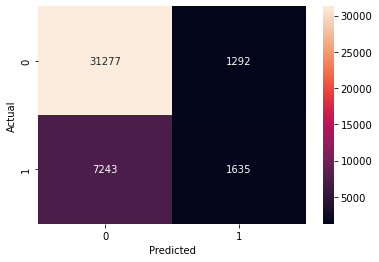

In [112]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [113]:
accuracy_score(y_test,y_pred)

0.7940743600260574

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     32569
           1       0.56      0.18      0.28      8878

    accuracy                           0.79     41447
   macro avg       0.69      0.57      0.58     41447
weighted avg       0.76      0.79      0.75     41447



### ROC Curve for XGBoost

In [118]:
y_pred_probs = xgbcl.predict_proba(x_test)

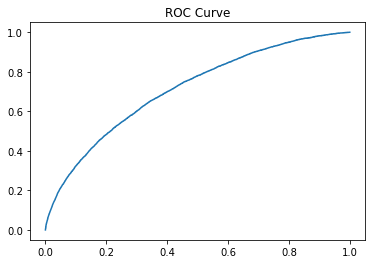

In [119]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_probs[:,1])
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()

In [120]:
auc = roc_auc_score(y_test, y_pred_probs[:,1])
auc

0.7121039784451664

## Stack ensemble Classification

In [614]:
stack_model = StackingClassifier(estimators=[('rf',orf),('xgboost',xgbcl)])

In [622]:
score = cross_val_score(stack_model,x_train,y_train,cv = 5,scoring = 'accuracy')

In [623]:
print("The accuracy score of is:",score)

The accuracy score of is: [0.84373303 0.84261478 0.83992587 0.84372803 0.84248195]


In [625]:
sm = stack_model.fit(x_train,y_train)

In [626]:
sm_pred = sm.predict(x_test)
confusion_matrix(y_test,sm_pred)

array([[30096,  2473],
       [ 6534,  2344]], dtype=int64)

In [627]:
accuracy_score(y_test,sm_pred)

0.7826863222911188

In [628]:
#sm.get_params()

{'cv': None,
 'estimators': [('rf',
   RandomForestClassifier(max_depth=30, max_features=25, min_samples_leaf=25,
                          min_samples_split=25, n_estimators=400, random_state=8)),
  ('xgboost',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=None,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'final_est